<a href="https://colab.research.google.com/github/GioLomia/Semantic_Image_Manipulation/blob/master/My_project/Image_Object_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import tensorflow as tf
import numpy as np
from tkinter import *
import matplotlib as plt

In [0]:
tf.__version__=2.0
print("Using the TensorFlow Version:", tf.__version__)
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install gluon
!pip install mxnet
!pip install gluoncv

In [4]:
!ls "/content/drive/My Drive/Colab Notebooks/Image_Object_Transfer/images"

1045023827_4ec3e8ba5c_z.jpg  6584515005_fce9cec486_z.jpg
12283150_12d37e6389_z.jpg    6821351586_59aa0dc110_z.jpg
2383514521_1fc8d7b0de_z.jpg  7581246086_cf7bbb7255_z.jpg
2502287818_41e4b0c4fb_z.jpg  7933423348_c30bd9bd4e_z.jpg
2516944023_d00345997d_z.jpg  8053677163_d4c8f416be_z.jpg
25691390_f9944f61b5_z.jpg    8239308689_efa6c11b08_z.jpg
262985539_1709e54576_z.jpg   8433365521_9252889f9a_z.jpg
3132016470_c27baa00e8_z.jpg  8512296263_5fc5458e20_z.jpg
3627527276_6fe8cd9bfe_z.jpg  8699757338_c3941051b6_z.jpg
3651581213_f81963d1dd_z.jpg  8734543718_37f6b8bd45_z.jpg
3800883468_12af3c0b50_z.jpg  8829708882_48f263491e_z.jpg
3862500489_6fd195d183_z.jpg  9118579087_f9ffa19e63_z.jpg
3878153025_8fde829928_z.jpg  9247489789_132c0d534a_z.jpg
4410436637_7b0ca36ee7_z.jpg  im1.jpg
4782628554_668bc31826_z.jpg  office-stationary-products-500x500.jpg
5951960966_d4e1cda5d0_z.jpg


# Segmentation Model: Supervised Mask R-CNN

In [0]:
from matplotlib import pyplot as plt
import gluon
from gluoncv import model_zoo, data, utils
from PIL import Image, ImageTk
import numpy as np
import scipy.misc
import imageio
import mxnet
import tkinter as tk


class Segmentor:
    def __init__(self, mask=True, bboxes=False, model_name='mask_rcnn_resnet50_v1b_coco'):
        self.mask = mask
        self.bboxes = bboxes
        self.net = model_zoo.get_model(model_name, pretrained=True)
        self.mask = None
        self.im = None
        self.scores = None

    def read_im(self, path):
        x, orig_img = data.transforms.presets.rcnn.load_test(path)

        return x, orig_img

    def segment(self, x, orig_img):
        """
        Segments the picture.
        """
        ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in self.net(x)]
        # paint segmentation mask on images directly
        width, height = orig_img.shape[1], orig_img.shape[0]
        # Expand the mask onto the image
        masks = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
        # Plot the mask onto the image
        orig_img = utils.viz.plot_mask(orig_img, masks)
        self.mask = masks
        self.im = orig_img
        self.scores=scores

    def create_im_with_mask(self):
        """
        Plots the segmented image.
        """
        fig = plt.figure(figsize=(15, 15))
        ax = fig.add_subplot(1, 1, 1)
        ax = utils.viz.plot_mask(self.im, self.mask)
        plt.imshow(ax)
        plt.show()
        return ax

    def plot_mask(self,ax):
        pass
        


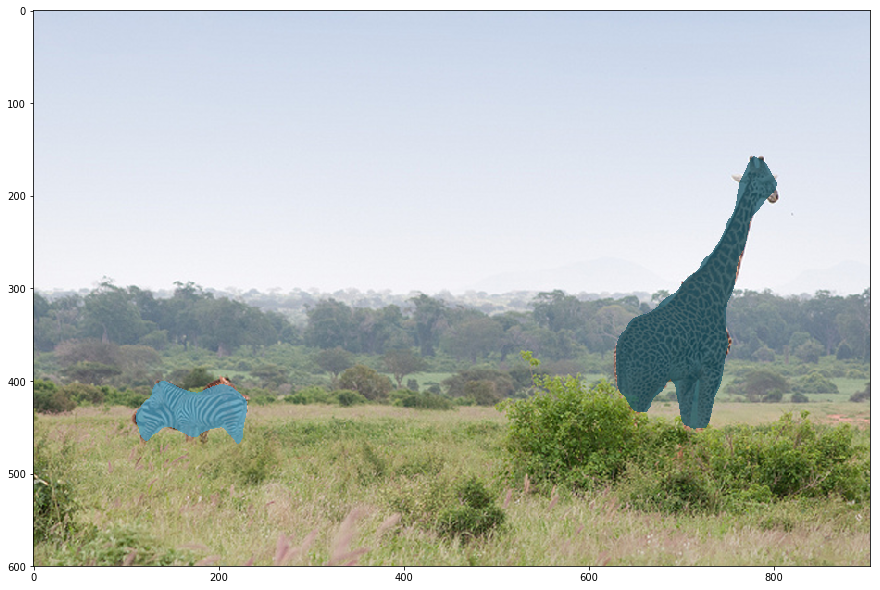

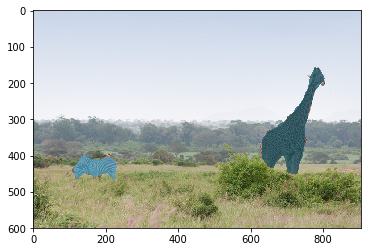

In [161]:
im_dir_path="/content/drive/My Drive/Colab Notebooks/Image_Object_Transfer/images/"
im_name="6584515005_fce9cec486_z.jpg"

full_im_path=im_dir_path+im_name
seg=Segmentor()

x,im=seg.read_im(full_im_path)
seg.segment(x,im)
masked_im=seg.create_im_with_mask()
plt.imshow(masked_im)


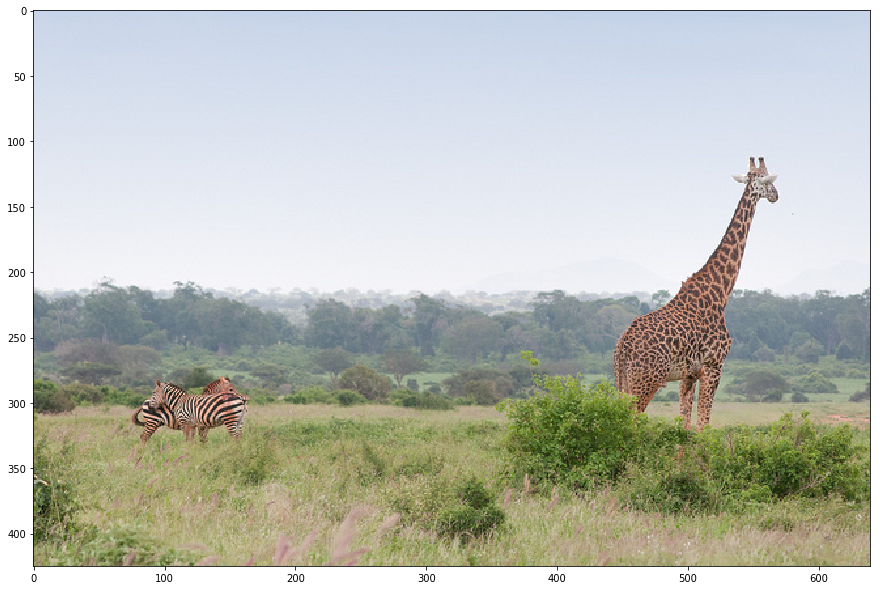

In [162]:
fig2 = plt.figure(figsize=(15, 15))
plt.imshow(Image.open(full_im_path))
plt.show()

In [0]:
def mask_seperate(out_mask):
    """
    Mask seperator. That splits all the masks and transforms tham into actuall images.
    """
    height,width=len(out_mask[0]),len(out_mask[0][0])
    matrix = np.zeros((height,width,3))

    mask_arr=[]
    background=[0,0,0]
    color=list(np.random.choice(range(256), size=3))

    for mask in range(len(out_mask)):
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if out_mask[mask][i][j]==0:
                    matrix[i][j]=[0,0,0]
                else:
                    matrix[i][j]=color
        color=list(np.random.choice(range(256), size=3))
        mask_arr.append(matrix)
        matrix = np.zeros((height,width,3))
    return mask_arr

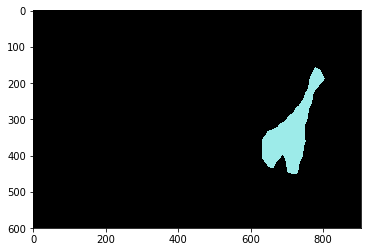

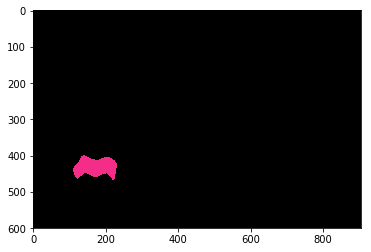

In [164]:
masks=mask_seperate(seg.mask)
for i in masks:
    plt.imshow((i* 255).astype(np.uint8))
    plt.show()

# Doing Semantic Segmentation with Fully-Convolutional Network
Referance: [Image Segmentation With Fully Connected ConvNet](https://medium.com/nanonets/how-to-do-image-segmentation-using-deep-learning-c673cc5862ef)